In [ ]:
import finnhub_utils
import pandas as pd
import alpha_vantage_utils
import api_usage


In [ ]:

alpha_client = alpha_vantage_utils.AlphaVantageClient()
x = alpha_client.get_earnings('META')

dict_keys(['symbol', 'annualEarnings', 'quarterlyEarnings'])

In [4]:
alpha_vantage = api_usage.ApiUsageClient('AlphaVantage')
response = alpha_vantage.get_cache('https://www.alphavantage.co/query?function=EARNINGS_CALL_TRANSCRIPT&symbol=GM&quarter=2025Q2')

In [ ]:
import json
json.loads(response[0])

In [6]:
response

('{"symbol": "GM", "quarter": "2025Q2", "transcript": [{"speaker": "Operator", "title": "Operator", "content": "Good morning, and welcome to the General Motors Company Second Quarter 2025 Earnings Conference Call. During the opening remarks, all participants will be in a listen-only mode. After the opening remarks, we will conduct a question and answer session. We are asking analysts to limit their questions to one and a brief follow-up. As a reminder, this conference call is being recorded Tuesday, July 22, 2025. I would now like to turn the call over to Ashish Kohli, GMC Vice President of Investor Relations.", "sentiment": "0.0"}, {"speaker": "Ashish Kohli", "title": "Vice President of Investor Relations", "content": "Thanks, Amanda, and good morning, everyone. We appreciate you joining us as we review GM\'s financial results for the second quarter of 2025. Our conference call materials were issued this morning and are available on GM\'s Investor Relations website. We are also broadc

In [ ]:
import sqlite3
from datetime import datetime, date
import requests


conn = sqlite3.connect("api_usage.db")
cursor = conn.cursor()
cursor.execute(f"""
    SELECT * FROM AlphaVantage
    WHERE url = ?
    AND response is NOT NULL
""", (url,))
row = cursor.fetchone()

tuple

# get earnings data from finnhub

In [ ]:
df_earnings = finnhub_utils.get_earnings_calendar("2025-07-20", "2025-07-26")
df_earnings = df_earnings.sort_values(by='revenueActual', ascending=False).head(50)

company_profiles = {}
for index, row in df_earnings.iterrows():
    company_profiles[row['symbol']] = finnhub_utils.get_company_profile(row['symbol'])
# Dictionary with keys as rows (default)

In [12]:
import pandas as pd
df_company_profiles = pd.DataFrame(company_profiles).T
dfep = df_earnings.merge(df_company_profiles, left_on='symbol', right_on='ticker', how='inner')



In [15]:
dfep['PS'] = dfep['marketCapitalization']/dfep['revenueActual']*1000
dfep.sort_values('PS', ascending=False).head()

,date,epsActual,epsEstimate,hour,quarter,revenueActual,revenueEstimate,symbol,year,eps_diff_percent,...,finnhubIndustry,ipo,logo,marketCapitalization,name,phone,shareOutstanding,ticker,weburl,PS
7,2025-07-23,0.40,0.4373,amc,2,2.249600e+10,2.319120e+10,TSLA,2025,-0.093250,...,Automobiles,2013-03-06,https://static2.finnhub.io/file/publicdatany/f...,1019435.362154,Tesla Inc,15125168177,3220.96,TSLA,https://www.tesla.com/,0.045316
46,2025-07-23,0.75,0.7318,bmo,2,5.061000e+09,4.941412e+09,BSX,2025,0.024267,...,Health Care,1992-05-19,https://static2.finnhub.io/file/publicdatany/f...,157028.440724,Boston Scientific Corp,15086834000,1479.45,BSX,https://www.bostonscientific.com/en-US/Home.html,0.031027
0,2025-07-23,5.12,2.2500,amc,2,8.172300e+10,9.681740e+10,GOOGL,2025,0.560547,...,Media,2004-08-19,https://static2.finnhub.io/file/publicdatany/f...,2348539.332924,Alphabet Inc,16502530000,12135,GOOGL,https://abc.xyz/,0.028738
38,2025-07-22,1.80,1.6602,bmo,2,5.936000e+09,5.896088e+09,DHR,2025,0.077667,...,Life Sciences Tools & Services,1969-12-10,https://static2.finnhub.io/file/publicdatany/f...,147134.275799,Danaher Corp,12028280850,715.67,DHR,https://www.danaher.com/,0.024787
24,2025-07-22,1.91,1.9137,bmo,2,1.014000e+10,1.064316e+10,PM,2025,-0.001937,...,Tobacco,2008-03-17,https://static2.finnhub.io/file/publicdatany/f...,250474.732945,Philip Morris International Inc,12039052410,1556.52,PM,https://www.pmi.com/,0.024702


In [2]:
#fcx = finnhub_utils.get_sec_filing('FCX')

alpha_vantage_client = alpha_vantage_utils.AlphaVantageClient()
earnings = alpha_vantage_client.get_earnings_call('GM')


In [ ]:
earnings


In [12]:
earnings.iloc[0].transcript


{'speaker': 'David Joint',
 'title': 'Vice President, Investor Relations',
 'content': "Good morning, everyone, and welcome to the Freeport conference call. Earlier this morning, FCX reported its second quarter 2025 operating and financial results. A copy of today's release with supplemental schedules and slides is available on our website, fcx.com. Today's conference call is being broadcast live on the Internet, and anyone may listen to the call by accessing our website homepage and clicking on the webcast link. In addition to analysts and investors, the financial press has been invited to listen to today's call. A replay of the webcast will be available on our website later today. Before we begin our comments, we'd like to remind everyone that today's press release and certain of our comments on the call include non-GAAP measures and forward-looking statements, and actual results may differ materially. Please refer to the cautionary language included in our press release and slides a

In [11]:
earnings['transcript'].to_json()


'{"0":{"speaker":"David Joint","title":"Vice President, Investor Relations","content":"Good morning, everyone, and welcome to the Freeport conference call. Earlier this morning, FCX reported its second quarter 2025 operating and financial results. A copy of today\'s release with supplemental schedules and slides is available on our website, fcx.com. Today\'s conference call is being broadcast live on the Internet, and anyone may listen to the call by accessing our website homepage and clicking on the webcast link. In addition to analysts and investors, the financial press has been invited to listen to today\'s call. A replay of the webcast will be available on our website later today. Before we begin our comments, we\'d like to remind everyone that today\'s press release and certain of our comments on the call include non-GAAP measures and forward-looking statements, and actual results may differ materially. Please refer to the cautionary language included in our press release and slid

# Yahoo finance

In [13]:
import yfinance as yf
ticker = yf.Ticker("AAPL")
data = yf.download("AAPL", period="1y", interval="1d", multi_level_index=False)



/var/folders/9j/1z2r_h2x7jdf99zq40__2f5h0000gn/T/ipykernel_79486/448735997.py:3: FutureWarning:

YF.download() has changed argument auto_adjust default to True

[*********************100%***********************]  1 of 1 completed


/Users/x/AiFinance/TradingAgents/tradingagents/dataflows/candle_utils.py:13: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(symbol, period="1y", interval="1d", multi_level_index=False)
[*********************100%***********************]  1 of 1 completed
/Users/x/AiFinance/TradingAgents/tradingagents/dataflows/candle_utils.py:32: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


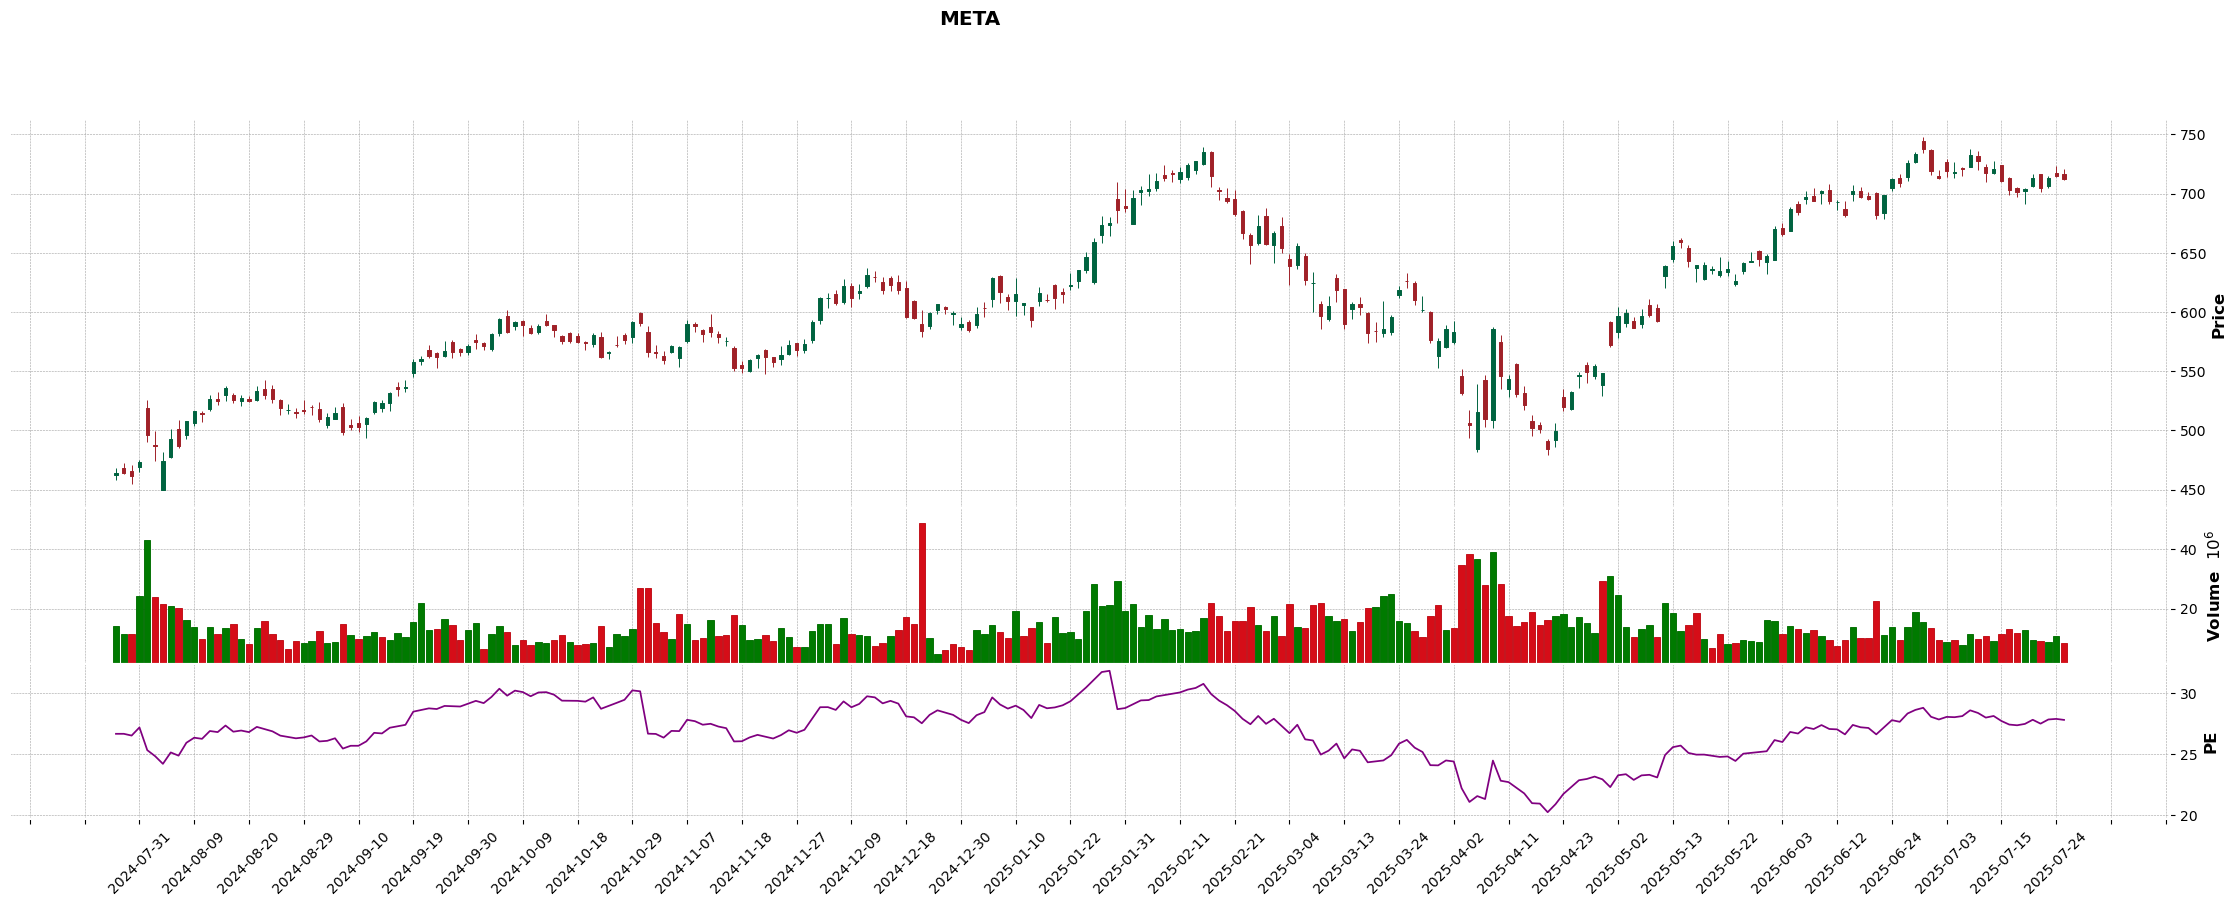

In [ ]:
import candle_utils

candle_utils.save_ticker_1y_candle('META', dpi=50)

In [10]:
candle_utils.call_openai_with_image_path('meta_candle.png', 
                                         model = 'o4-mini',
                                         query='given the graph, can you tell me when is a good time to buy the stock?')

'I’m not a licensed investment adviser, but purely from the price action on this chart the clearest “buy” signal would have been on the sharp pull-back to the mid-$270s in late March/early April 2024.  That was…\n\n• A pronounced local low in the candlesticks (a “dip” into long-term uptrend support)  \n• Accompanied by a trough in the P/E (purple line) down near 20—suggesting a momentary valuation sweet spot  \n• Followed almost immediately by a sustained rally from the high-$270s back up toward $350+\n\nYou’ll notice smaller pullbacks—e.g. late October 2023 into the $295–305 range—also marked lower-risk entries ahead of the next leg up.  If you’re looking at the stock today (around $700+), similar logic would suggest waiting for a mild dip back toward your nearest technical support (for example in the $680–690 area) or a momentary decline in fundamentals (P/E) before layering in.\n\nOf course, past patterns never guarantee future performance.  Always do your own due diligence on funda

# test draw candle

# get sec filing raw data

In [24]:
import requests

url = "https://www.sec.gov/Archives/edgar/data/320193/000032019323000106/aapl-20230930.htm"
headers = {
    "User-Agent": "MyApp/1.0 (myemail@example.com)",
    "Accept-Encoding": "gzip, deflate",
    "Host": "www.sec.gov"
}

response = requests.get(url, headers=headers)
html_text = response.text
print(response)

<Response [200]>


In [29]:
print(response.content)

b'<?xml version="1.0" ?><!--XBRL Document Created with the Workiva Platform--><!--Copyright 2023 Workiva--><!--r:c68c2fd8-345e-4faa-8610-8b173d5da094,g:843081e3-ad04-4f75-a78c-e87ea3423788,d:1cb1ba018cb1455aa66bd3f9ab0c5b1a--><html xmlns:ix="http://www.xbrl.org/2013/inlineXBRL" xmlns:dei="http://xbrl.sec.gov/dei/2023" xmlns:ixt="http://www.xbrl.org/inlineXBRL/transformation/2020-02-12" xmlns:ixt-sec="http://www.sec.gov/inlineXBRL/transformation/2015-08-31" xmlns:aapl="http://www.apple.com/20230930" xmlns="http://www.w3.org/1999/xhtml" xmlns:link="http://www.xbrl.org/2003/linkbase" xmlns:srt="http://fasb.org/srt/2023" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns:country="http://xbrl.sec.gov/country/2023" xmlns:us-gaap="http://fasb.org/us-gaap/2023" xmlns:iso4217="http://www.xbrl.org/2003/iso4217" xmlns:xbrli="http://www.xbrl.org/2003/instance" xmlns:xbrldi="http://xbrl.org/2006/xbrldi" xmlns:ecd="http://xbrl.sec.gov/ecd/2023" xml

'\n\naapl-20230930\nfalse\n2023\nFY\n0000320193\nP1Y\n67\nP1Y\n25\nP1Y\n7\n1\nhttp://fasb.org/us-gaap/2023#MarketableSecuritiesCurrent http://fasb.org/us-gaap/2023#MarketableSecuritiesNoncurrent\nhttp://fasb.org/us-gaap/2023#MarketableSecuritiesCurrent http://fasb.org/us-gaap/2023#MarketableSecuritiesNoncurrent\nhttp://fasb.org/us-gaap/2023#LongTermDebtCurrent http://fasb.org/us-gaap/2023#LongTermDebtNoncurrent\nhttp://fasb.org/us-gaap/2023#LongTermDebtCurrent http://fasb.org/us-gaap/2023#LongTermDebtNoncurrent\nhttp://fasb.org/us-gaap/2023#OtherAssetsNoncurrent\nhttp://fasb.org/us-gaap/2023#OtherAssetsNoncurrent\nhttp://fasb.org/us-gaap/2023#PropertyPlantAndEquipmentNet\nhttp://fasb.org/us-gaap/2023#PropertyPlantAndEquipmentNet\nhttp://fasb.org/us-gaap/2023#OtherLiabilitiesCurrent\nhttp://fasb.org/us-gaap/2023#OtherLiabilitiesCurrent\nhttp://fasb.org/us-gaap/2023#OtherLiabilitiesNoncurrent\nhttp://fasb.org/us-gaap/2023#OtherLiabilitiesNoncurrent\nhttp://fasb.org/us-gaap/2023#OtherLiab

In [28]:

# Parse with lxml HTML parser
from lxml import etree, html

tree = html.fromstring(response.content)

# Extract all visible text (including inside ix: tags)
# This will include iXBRL tagged content
ix_texts = tree.xpath('//ix:nonnumeric | //ix:nonfraction')

# Extract text content
all_text = []
for ix in ix_texts:
    # Get either the text inside the tag or fallback to .text_content()
    txt = ix.text_content().strip()
    if txt:
        all_text.append(txt)

# Combine into a full document string
document_text = "\n".join(all_text)

print(document_text[:2000])  # preview

XPathEvalError: Undefined namespace prefix

In [16]:
sec_filings.query('type=="10-K"').edgarUrl.iloc[0]



'https://finance.yahoo.com/sec-filing/AAPL/0000320193-23-000106_320193'